In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from plot_function import *
%matplotlib inline

results = pd.read_csv('survey-results-public.csv')
schema = pd.read_csv('survey-results-schema.csv')
schema.head()

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


What kinds of question are there in this survey?

In [2]:
question_types = {}
data_type = results.dtypes
for column_index, column in enumerate(results.columns):
    if column == "Respondent":
        continue
    question_schema = schema.loc[schema['Column'] == column]
    question_string = list(question_schema['Question'])[0]
    if str(data_type[column_index]) == "float64":
            question_type = "number"
    else:
        if results[column].str.contains(";").sum() > 0:
            question_type = "multiple selection"
        else:
            question_type = "single selection"
    question_types.setdefault(question_type, []).append(column)
{key: len(value) for (key, value) in question_types.items()}

{'single selection': 125, 'multiple selection': 22, 'number': 6}

Now that I know what kind of question each column is associated with, I can count and average the number of responses

In [3]:
answer_counts = {}
for question_type in question_types:
    counts = list(results[question_types[question_type]].count())
    average = sum(counts)/len(counts)
    answer_counts.setdefault(question_type, average)
answer_counts

{'single selection': 28210.04,
 'multiple selection': 27002.272727272728,
 'number': 25953.333333333332}

Now I have the counts I can graph them based on their question types

C:\Users\killa\Documents\udacity ds nanodegree\project1\plot_function.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_tickets, rotation=45)


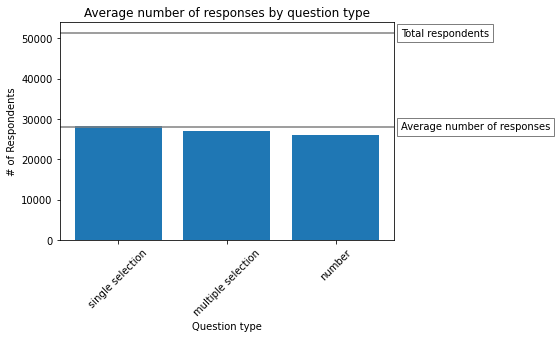

In [5]:
column_counts = results.count()
plot_response_graph(
    answer_counts, sum(column_counts)/len(column_counts), results.shape[0],
    title="Average number of responses by question type",
    x_label="Question type"
)